In [123]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

In [124]:
#read data
listings_2017 = pd.read_csv('InsideAirBnb/listings_2017.csv')
listings_2018 = pd.read_csv('InsideAirBnb/listings_2018.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
#define outcome as listings in 2017 that don't appear in 2018
set_18 = set(listings_2018.id)
listings_2017['drop_out'] = listings_2017['id'].apply(lambda x: 0 if x in set_18 else 1)

In [126]:
listings_2017.drop_out.value_counts(dropna = False)

0    18425
1    11737
Name: drop_out, dtype: int64

In [127]:
listings_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 96 columns):
id                                  30162 non-null int64
listing_url                         30162 non-null object
scrape_id                           30162 non-null int64
last_scraped                        30162 non-null object
name                                30162 non-null object
summary                             29447 non-null object
space                               21223 non-null object
description                         30156 non-null object
experiences_offered                 30162 non-null object
neighborhood_overview               18075 non-null object
notes                               13621 non-null object
transit                             17652 non-null object
access                              18664 non-null object
interaction                         17863 non-null object
house_rules                         21408 non-null object
thumbnail_url          

In [128]:
listings_2017.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,drop_out
count,3.016200e+04,3.016200e+04,3.016200e+04,0.0,30152.000000,30152.000000,0.0,30162.000000,30162.000000,30162.000000,...,23059.000000,23019.000000,23020.000000,22986.000000,23018.000000,22982.000000,22974.000000,30162.000000,23357.000000,30162.000000
mean,1.048717e+07,2.017040e+13,3.487289e+07,NaN,5.109213,5.109213,NaN,34.056197,-118.336155,3.411445,...,94.186044,9.611799,9.410990,9.765857,9.769311,9.609346,9.479890,3.460845,1.827499,0.389132
std,5.379367e+06,1.026970e+01,3.312089e+07,NaN,24.777857,24.777857,NaN,0.102051,0.152590,2.471226,...,7.964227,0.784745,0.959283,0.657675,0.641670,0.730362,0.833353,5.400201,1.894675,0.487561
min,1.090000e+02,2.017040e+13,5.900000e+01,NaN,0.000000,0.000000,NaN,33.338905,-118.911026,1.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000,0.000000
25%,6.040025e+06,2.017040e+13,7.216112e+06,NaN,1.000000,1.000000,NaN,34.013987,-118.433115,2.000000,...,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.410000,0.000000
50%,1.165879e+07,2.017040e+13,2.407992e+07,NaN,2.000000,2.000000,NaN,34.066379,-118.350220,2.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.120000,0.000000
75%,1.523654e+07,2.017040e+13,5.333126e+07,NaN,4.000000,4.000000,NaN,34.103849,-118.269669,4.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.690000,1.000000
max,1.801118e+07,2.017040e+13,1.238270e+08,NaN,856.000000,856.000000,NaN,34.742088,-117.655471,16.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,48.000000,18.880000,1.000000


In [129]:
listings_2017.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,drop_out
0,6627359,https://www.airbnb.com/rooms/6627359,20170402075022,2017-04-02,Beautiful Beverly Hills Estate,Private estate with private driveway and walkw...,NaN,Private estate with private driveway and walkw...,none,NaN,...,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,6,NaN,0
1,13960394,https://www.airbnb.com/rooms/13960394,20170402075022,2017-04-02,Beverly Hills Chateau,"The home is a gorgeous 5 bedroom, 5 bathroom, ...",NaN,"The home is a gorgeous 5 bedroom, 5 bathroom, ...",none,NaN,...,f,NaN,"City of Los Angeles, CA",f,strict,f,f,4,NaN,0
2,17992978,https://www.airbnb.com/rooms/17992978,20170402075022,2017-04-02,Grande Bellezza - 119182,Experience inviting Italian elegance in Beverl...,The villa’s refinement is set off by the views...,Experience inviting Italian elegance in Beverl...,none,Points of Interest 5.7 miles to Rodeo Drive 6 ...,...,f,NaN,NaN,f,super_strict_60,f,f,12,NaN,1
3,11344969,https://www.airbnb.com/rooms/11344969,20170402075022,2017-04-02,Beverly Hills Private Guest House,Newly renovated guest house with huge flatscre...,NaN,Newly renovated guest house with huge flatscre...,none,NaN,...,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,NaN,0
4,8985400,https://www.airbnb.com/rooms/8985400,20170402075022,2017-04-02,Private room in lovely condo,LOCATION!! Your own private room with bathroom...,NaN,LOCATION!! Your own private room with bathroom...,none,"safe, peaceful tree lined street",...,f,NaN,"City of Los Angeles, CA",f,strict,f,f,3,0.9,1


In [130]:
#Data cleaning
#Drop columns with all missing or irrelevant data
listings_2017 = listings_2017.drop(['host_acceptance_rate', 
                                    'neighbourhood_group_cleansed',
                                    'thumbnail_url',
                                    'medium_url',
                                    'picture_url',
                                    'xl_picture_url',
                                    'host_thumbnail_url',
                                    'host_picture_url'], axis=1)
#All dates to datetime
time_format = '%Y-%m-%d'
listings_2017['last_scraped'] = pd.to_datetime(listings_2017['last_scraped'], format=time_format)
listings_2017['host_since'] = pd.to_datetime(listings_2017['host_since'], format=time_format)
listings_2017['calendar_last_scraped'] = pd.to_datetime(listings_2017['calendar_last_scraped'], format=time_format)
listings_2017['first_review'] = pd.to_datetime(listings_2017['first_review'], format=time_format)
listings_2017['last_review'] = pd.to_datetime(listings_2017['last_review'], format=time_format)

#All dollars to float
listings_2017['price'] = listings_2017['price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['weekly_price'] = listings_2017['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['monthly_price'] = listings_2017['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['security_deposit'] = listings_2017['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['cleaning_fee'] = listings_2017['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

#All dates to datetime
time_format = '%Y-%m-%d'
listings_2017['last_scraped'] = pd.to_datetime(listings_2017['last_scraped'], format=time_format)
listings_2017['host_since'] = pd.to_datetime(listings_2017['host_since'], format=time_format)
listings_2017['calendar_last_scraped'] = pd.to_datetime(listings_2017['calendar_last_scraped'], format=time_format)
listings_2017['first_review'] = pd.to_datetime(listings_2017['first_review'], format=time_format)
listings_2017['last_review'] = pd.to_datetime(listings_2017['last_review'], format=time_format)

#Specify categories
listings_2017['room_type'] = listings_2017.room_type.astype('category')
listings_2017['property_type'] = listings_2017.property_type.astype('category')
listings_2017['host_neighbourhood'] = listings_2017.host_neighbourhood.astype('category')
listings_2017['neighbourhood'] = listings_2017.neighbourhood.astype('category')
listings_2017['neighbourhood_cleansed'] = listings_2017.neighbourhood_cleansed.astype('category')
listings_2017['city'] = listings_2017.city.astype('category')
listings_2017['state'] = listings_2017.state.astype('category')
listings_2017['zipcode'] = listings_2017.zipcode.astype('category')
listings_2017['market'] = listings_2017.market.astype('category')
listings_2017['smart_location'] = listings_2017.smart_location.astype('category')
listings_2017['bed_type'] = listings_2017.bed_type.astype('category')
listings_2017['cancellation_policy'] = listings_2017.cancellation_policy.astype('category')

#Change to binary
listings_2017['host_is_superhost'] = listings_2017['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['host_has_profile_pic'] = listings_2017['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['host_identity_verified'] = listings_2017['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['is_location_exact'] = listings_2017['is_location_exact'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['requires_license'] = listings_2017['requires_license'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['instant_bookable'] = listings_2017['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['require_guest_profile_picture'] = listings_2017['require_guest_profile_picture'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['require_guest_phone_verification'] = listings_2017['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)

#Feature generation
#monthly_occupancy = los * (review_per_month / review_rate) (where los = 3 nights, review_rate = 0.50)
listings_2017['monthly_occupancy'] = 3 * (listings_2017['reviews_per_month']/0.50) 
listings_2017['est_monthly_income'] = listings_2017['monthly_occupancy']* listings_2017['price']
#lenght of hosting
listings_2017['host_hist_dur'] = pd.to_datetime('2017-04-17', format = time_format) - listings_2017['host_since']

#Additional Cleaning/feature generation
#smart_location -> clean to align typos
#license -> get indicator if they have license
#propert_type -> create other category for uncommon values
#host_since -> create days since hosting began
#calendar_last_updated -> get approx days since last update
#get number of listings as 5, 10, 15 miles
#get number of hotels 5, 10, 15 miles away


In [131]:
listings_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 91 columns):
id                                  30162 non-null int64
listing_url                         30162 non-null object
scrape_id                           30162 non-null int64
last_scraped                        30162 non-null datetime64[ns]
name                                30162 non-null object
summary                             29447 non-null object
space                               21223 non-null object
description                         30156 non-null object
experiences_offered                 30162 non-null object
neighborhood_overview               18075 non-null object
notes                               13621 non-null object
transit                             17652 non-null object
access                              18664 non-null object
interaction                         17863 non-null object
house_rules                         21408 non-null object
host_id        

In [132]:
listings_2017.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,drop_out,monthly_occupancy,est_monthly_income,host_hist_dur
count,3.016200e+04,3.016200e+04,3.016200e+04,30162.000000,30152.000000,30152.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,23357.000000,30162.000000,23357.000000,23357.000000,30152
mean,1.048717e+07,2.017040e+13,3.487289e+07,0.186427,5.109213,5.109213,0.996585,0.693488,34.056197,-118.336155,...,0.031596,0.263676,0.026291,0.034911,3.460845,1.827499,0.389132,10.964996,1400.135838,968 days 12:18:48.999734
std,5.379367e+06,1.026970e+01,3.312089e+07,0.389457,24.777857,24.777857,0.058338,0.461052,0.102051,0.152590,...,0.174925,0.440633,0.160003,0.183559,5.400201,1.894675,0.487561,11.368047,1999.417302,614 days 17:55:04.985597
min,1.090000e+02,2.017040e+13,5.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,33.338905,-118.911026,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.120000,4.800000,15 days 00:00:00
25%,6.040025e+06,2.017040e+13,7.216112e+06,0.000000,1.000000,1.000000,1.000000,0.000000,34.013987,-118.433115,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.410000,0.000000,2.460000,247.500000,467 days 00:00:00
50%,1.165879e+07,2.017040e+13,2.407992e+07,0.000000,2.000000,2.000000,1.000000,1.000000,34.066379,-118.350220,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.120000,0.000000,6.720000,735.300000,870 days 12:00:00
75%,1.523654e+07,2.017040e+13,5.333126e+07,0.000000,4.000000,4.000000,1.000000,1.000000,34.103849,-118.269669,...,0.000000,1.000000,0.000000,0.000000,3.000000,2.690000,1.000000,16.140000,1888.560000,1385 days 00:00:00
max,1.801118e+07,2.017040e+13,1.238270e+08,1.000000,856.000000,856.000000,1.000000,1.000000,34.742088,-117.655471,...,1.000000,1.000000,1.000000,1.000000,48.000000,18.880000,1.000000,113.280000,96750.000000,3332 days 00:00:00


In [147]:
#Basic Univariate Stats
#Property_type
listings_2017.groupby('property_type')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,N,dropout_p
property_type,,
Lighthouse,1,1.000000
Train,1,1.000000
Timeshare,1,1.000000
Parking Space,1,1.000000
Boat,38,0.815789
Chalet,3,0.666667
Tent,18,0.611111
Serviced apartment,14,0.500000
Villa,220,0.481818


In [171]:
#Neighborhood
listings_2017.groupby('neighbourhood')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,N,dropout_p
neighbourhood,,
Lenox,1,1.000000
Cypress,1,1.000000
Artesia,1,1.000000
La Habra,1,1.000000
West Rancho Dominguez,1,1.000000
Bradbury,7,0.857143
Westmont,6,0.833333
South El Monte,3,0.666667
Compton,11,0.636364


In [165]:
#Room_type
listings_2017.groupby('room_type')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,N,dropout_p
room_type,,
Shared room,1571,0.557607
Private room,11186,0.406490
Entire home/apt,17405,0.362769


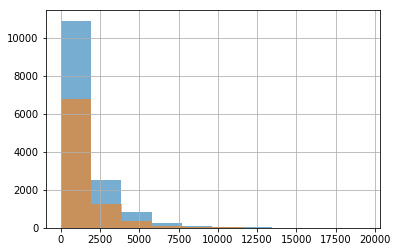

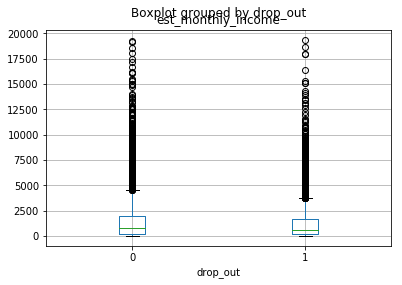

In [170]:
#length of hosting
listings_2017[listings_2017.est_monthly_income < 20000].groupby('drop_out').est_monthly_income.hist(alpha = 0.6)
listings_2017[listings_2017.est_monthly_income < 20000].boxplot(column=['est_monthly_income'], by='drop_out')

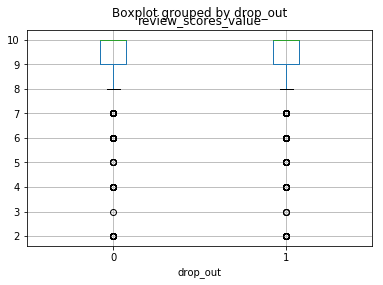

In [167]:
#reviews
listings_2017.boxplot(column=['review_scores_value'], by='drop_out')

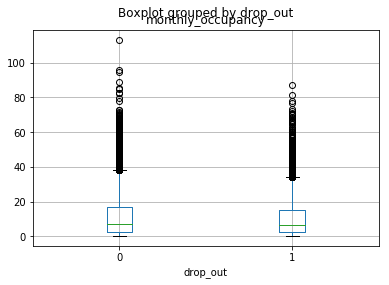

In [169]:
#monthly occupancy
listings_2017.boxplot(column=['monthly_occupancy'], by='drop_out')